#### ATL03 and ATL08 dataframes at their base

In [2]:
import geopandas as gpd
from shapely.geometry import Point, box as shapely_box
import simplekml
from scripts.track_pairs import *
from scripts.classes_fixed import *

dirpath = '../data/sodankyla_full/'

data = []

all_ATL03, all_ATL08 = track_pairs(dirpath)
N = len(all_ATL03)

atl03 = ATL03(all_ATL03[0],all_ATL08[0],'gt1r')
atl08 = ATL08(all_ATL08[0], 'gt1r')

print(atl03.df)
print(atl08.df)

               lon        lat           z   h  conf  classification
0        34.068226  79.994055  240.178177 NaN     0            -1.0
1        34.068278  79.994056  121.262169 NaN     0            -1.0
2        34.068394  79.994058 -145.961853 NaN     0            -1.0
3        34.068204  79.994048  273.468506 NaN     0            -1.0
4        34.068220  79.994043  219.857101 NaN     0            -1.0
...            ...        ...         ...  ..   ...             ...
6851579  24.583869  59.498839   60.433582 NaN     0             0.0
6851580  24.583872  59.498840   17.645369 NaN     2             0.0
6851581  24.583867  59.498832   74.309540 NaN     0             0.0
6851582  24.583868  59.498827   34.154701 NaN     0             0.0
6851583  24.583869  59.498827   17.988764 NaN     2             0.0

[6851584 rows x 6 columns]
            lat        lon          gh         ch  Ng  Nv        Eg        Ev  \
8     70.567169  27.627876  322.463715  12.751556   5  29  0.089286  0.4642

#### Geopandas polygon cropping ATL08 dataframe

In [1]:
from scripts.parallel import *

dirpath = '../data/sodankyla_full/'

data = []

all_ATL03, all_ATL08 = track_pairs(dirpath)
N = len(all_ATL03)

atl03 = ATL03(all_ATL03[0],all_ATL08[0],'gt1r')
atl08 = ATL08(all_ATL08[0], 'gt1r')

coords = (26.634154, 67.361833)

gdf = make_box(coords, 2,2)

# atl08.df['geometry'] = atl08.df.apply(lambda x: Point((float(x['lon']), float(x['lat']))), axis=1)
gdf_points = gpd.GeoDataFrame(atl08.df, geometry=gpd.points_from_xy(atl08.df['lon'], atl08.df['lat']), crs='EPSG:4326')
# gdf_points = gpd.GeoDataFrame(atl08.df, geometry='geometry', crs='EPSG:4326')

# Spatially join the two GeoDataFrames
atl08.df = gpd.sjoin(gdf_points, gdf, how='left', predicate='within')

# print(atl08.df.dropna().drop(['index_right'],axis=1))
print(atl08.df.dropna().drop(['index_right'],axis=1))
print()
print(gdf_points)
print()
print(gdf)

            lat        lon          gh         ch  Ng  Nv        Eg        Ev  \
230   69.322777  27.160498  242.106781  46.549164   2  45  0.019231  0.259615   
235   69.284508  27.146727  226.165192  20.789795   2  45  0.018349  0.403670   
236   69.283623  27.146402  229.332275  22.394623   1  51  0.009259  0.472222   
237   69.282730  27.146091  234.764236  24.419556   2  28  0.019417  0.349515   
241   69.262253  27.138895  236.022964   9.177124  10  18  0.093458  0.261682   
...         ...        ...         ...        ...  ..  ..       ...       ...   
2614  65.404625  25.958757   85.931839  14.230545  42  29  0.325581  0.302326   
2615  65.402840  25.958261   88.463974  14.489265  16  24  0.131148  0.245902   
2621  65.392136  25.955278   82.981529  20.687576  10  22  0.080000  0.280000   
2622  65.391251  25.955027   81.691254  16.891441  31  34  0.256198  0.330579   
2630  65.376091  25.950783   80.334053   9.225380  23  15  0.188525  0.213115   

      canopy_frac  terrain_

#### Geopandas polygon cropping ATL03 dataframe

In [5]:
from scripts.parallel import *

dirpath = '../data/sodankyla_full/'

data = []

all_ATL03, all_ATL08 = track_pairs(dirpath)
N = len(all_ATL03)

atl03 = ATL03(all_ATL03[0],all_ATL08[0],'gt1r')
atl08 = ATL08(all_ATL08[0], 'gt1r')

coords = (26.634154, 67.361833)

gdf = make_box(coords, 2,2)

print(1)
# atl08.df['geometry'] = atl08.df.apply(lambda x: Point((float(x['lon']), float(x['lat']))), axis=1)
# gdf_points = gpd.GeoDataFrame(atl03.df, geometry=gpd.points_from_xy(atl03.df['lon'], atl03.df['lat']), crs='EPSG:4326')
# gdf_points = gpd.GeoDataFrame(atl08.df, geometry='geometry', crs='EPSG:4326')
# Create GeoDataFrame directly from Point objects
points = [Point(lon, lat) for lon, lat in zip(atl03.df['lon'], atl03.df['lat'])]
print(1.5)
gdf_points = gpd.GeoDataFrame(atl03.df, geometry=points, crs='EPSG:4326')

print(2)
# Spatially join the two GeoDataFrames
atl03.df = gpd.sjoin(gdf_points, gdf, how='left', predicate='within')

# # Get minimum and maximum latitudes and longitudes of the polygon
# min_lon, min_lat, max_lon, max_lat = gdf.total_bounds

# # Filter the dataframe within the ranges of latitudes and longitudes
# filtered_atl03_df = atl03.df[(atl03.df['lon'] >= min_lon) & (atl03.df['lon'] <= max_lon) & (atl03.df['lat'] >= min_lat) & (atl03.df['lat'] <= max_lat)]

# print(atl08.df.dropna().drop(['index_right'],axis=1))
print(atl03.df.dropna().drop(['index_right'],axis=1))
print()
print(gdf_points)

1


Exception ignored in: <function BaseGeometry.__del__ at 0x000001C6A0F595E8>
Traceback (most recent call last):
  File "C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\shapely\geometry\base.py", line 194, in _empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 
Exception ignored in: <function BaseGeometry.__del__ at 0x000001C6A0F595E8>
Traceback (most recent call last):
  File "C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "C:\Users\s1803229\AppData\Local\miniforge-pypy3\envs\snow_env\lib\site-packages\shapely\geometry\base.py", line 194, in _empty
    self._lgeos.GEOSGeom_destroy(self.__geom__)
KeyboardInterrupt: 
Exception ignored in: <function BaseGeometry.__d

KeyboardInterrupt: 

#### $\rho_v/\rho_g$ algorithm applied to full algorithm

Beam 1 in file 0 has been skipped because of no data.
Beam 2 in file 0 has been skipped because of no data.
Beam 4 in file 0 has been skipped because of no data.


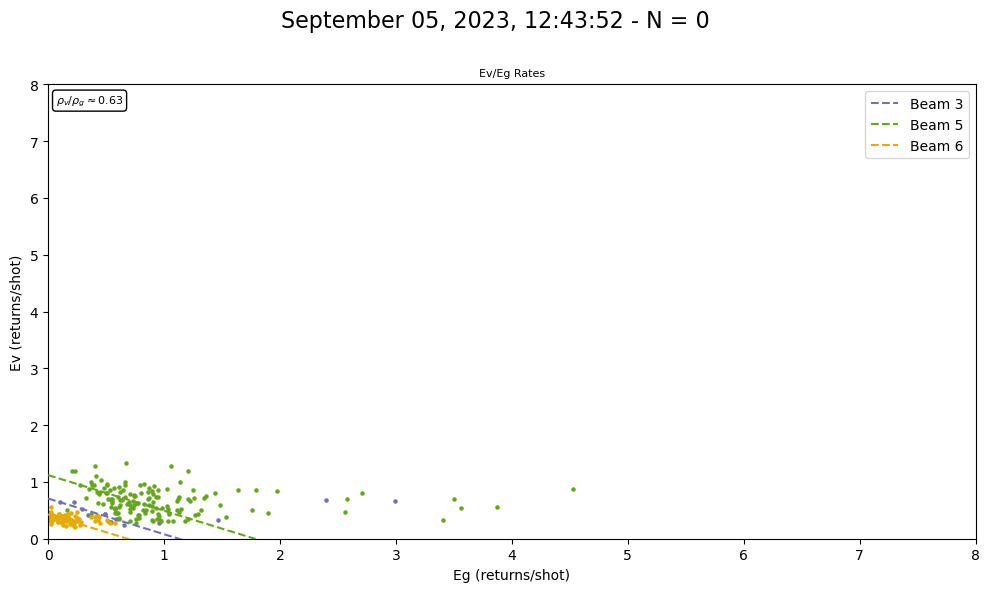

(array([-0.6284412 ,  0.70763094,  1.11993508,  0.4291311 ]), [[nan, 0.86427724, 0.94702643], [nan, nan, 0.16773042], [nan, 0.4594359, 0.6617002], [nan, nan, 0.34728995]], 1.825, 0.0, 0.07924754714670902)
Beam 3 in file 1 has been skipped because of no data.
Beam 4 in file 1 has been skipped because of no data.
Beam 5 in file 1 has been skipped because of no data.
Beam 6 in file 1 has been skipped because of no data.


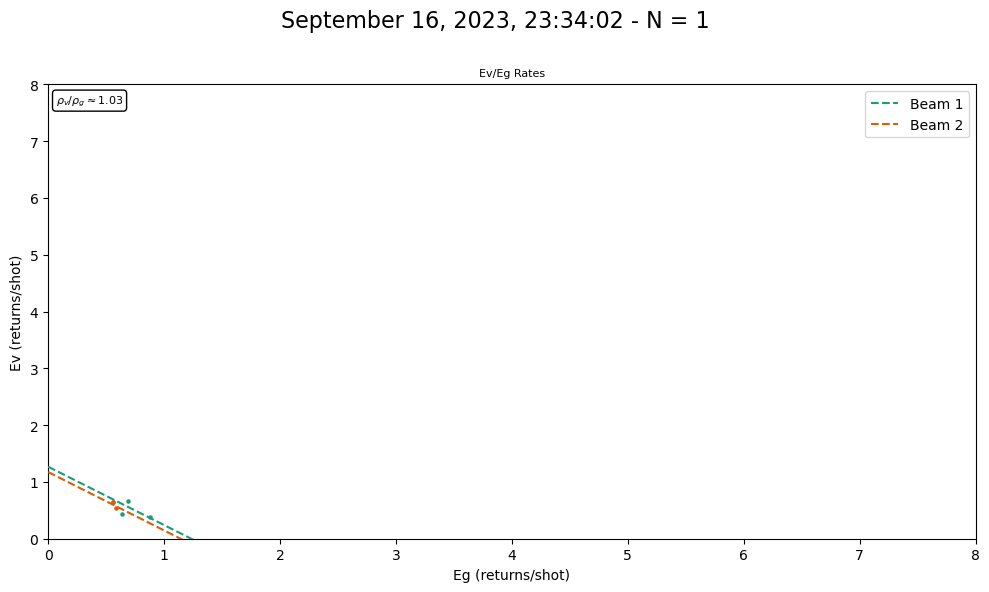

(array([-1.02761246,  1.26802119,  1.17389789]), [[0.6887015, nan, nan], [0.57069767, nan, nan], [0.5319416, nan, nan], [0.58744186, nan, nan]], 2.0, 1.0, 0.01696028932929039)
Beam 2 in file 2 has been skipped because of no data.
Beam 4 in file 2 has been skipped because of no data.
Beam 5 in file 2 has been skipped because of no data.
Beam 6 in file 2 has been skipped because of no data.


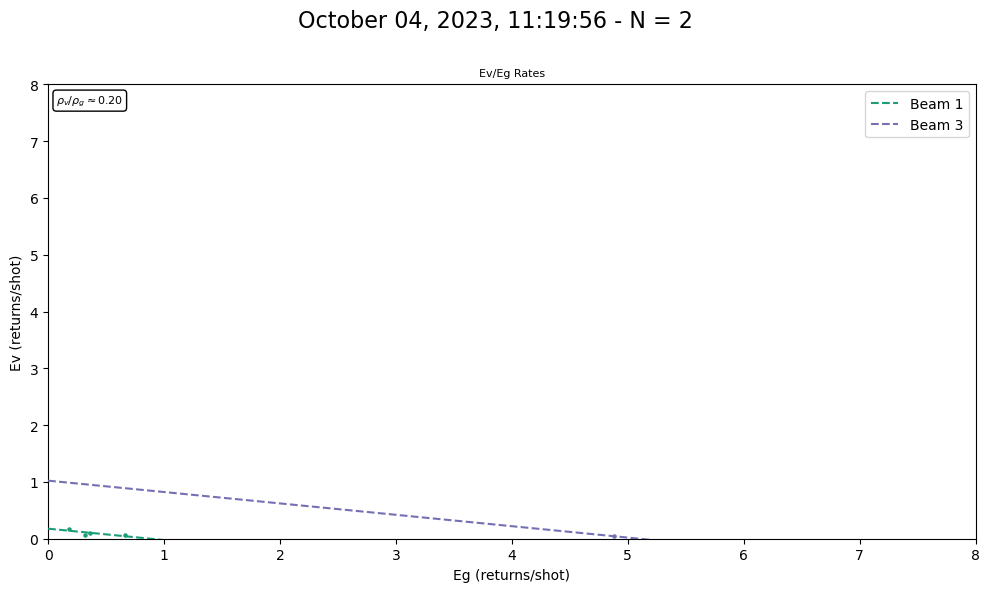

(array([-0.20050853,  0.17695353,  1.02262798]), [[0.37999293, 4.884892, nan], [nan, nan, nan], [0.1005653, 0.043165468, nan], [nan, nan, nan]], 3.0, 0.0, 0.022961080819368363)
Beam 1 in file 3 has been skipped because of no data.
Beam 2 in file 3 has been skipped because of no data.
Beam 3 in file 3 has been skipped because of no data.
Beam 4 in file 3 has been skipped because of no data.
Beam 5 in file 3 has been skipped because of no data.
Beam 6 in file 3 has been skipped because of no data.
No beams have data in file 3, cannot regress.
(0, 0, 0, 0, 0)


In [1]:
from scripts.parallel import *

dirpath = '../data/sodankyla_full/'

data = []

all_ATL03, all_ATL08 = track_pairs(dirpath)
N = len(all_ATL03)

sodankyla_coords = (26.634154, 67.361833)

for i in range(N):
    data = pvpg_parallel(all_ATL03[i], all_ATL08[i], coords=sodankyla_coords, width=.15,height=.15,graph_detail=1, loss='arctan',file_index=i, keep_flagged=1)
    print(data)

### Action points:
- See if you can trim atl03.df by lat and lon successfully, and plot without problems
- See if the data produced in this way is the same/similar as produced with processed subsetted data
- If all works, repeat FSC stats analysis with different ranges, as desired by Steve
- Pull up a topography map to make an isotherm, level air temperature and elevation